In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('data/cleaned_data.csv')

In [3]:
df.drop(['Unnamed: 0', 'index', 'Last Updated', 'App'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8387 non-null   object 
 1   Rating          8387 non-null   float64
 2   Reviews         8387 non-null   float64
 3   Size            8387 non-null   float64
 4   Installs        8387 non-null   int64  
 5   Type            8387 non-null   object 
 6   Content Rating  8387 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 458.8+ KB


In [5]:
cats = df.select_dtypes(include='object')

In [6]:
cats_dummies = pd.get_dummies(cats, columns=['Category', 'Type', 'Content Rating'], drop_first=True)

In [8]:
model_df = pd.concat((df, cats_dummies), axis=1)
model_df.drop(columns=['Category', 'Type', 'Content Rating'], axis = 1, inplace=True)
model_df

,Rating,Reviews,Size,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.100000,159.0,1.900000e+07,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.900000,967.0,1.400000e+07,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.700000,87510.0,8.700000e+06,5000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.500000,215644.0,2.500000e+07,50000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.300000,967.0,2.800000e+06,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,4.500000,38.0,5.300000e+07,5000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8383,5.000000,4.0,3.600000e+06,100,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8384,4.172966,3.0,9.500000e+06,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8385,4.500000,114.0,1.811096e+07,1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        8387 non-null   float64
 1   Reviews                       8387 non-null   float64
 2   Size                          8387 non-null   float64
 3   Installs                      8387 non-null   int64  
 4   Category_AUTO_AND_VEHICLES    8387 non-null   uint8  
 5   Category_BEAUTY               8387 non-null   uint8  
 6   Category_BOOKS_AND_REFERENCE  8387 non-null   uint8  
 7   Category_BUSINESS             8387 non-null   uint8  
 8   Category_COMICS               8387 non-null   uint8  
 9   Category_COMMUNICATION        8387 non-null   uint8  
 10  Category_DATING               8387 non-null   uint8  
 11  Category_EDUCATION            8387 non-null   uint8  
 12  Category_ENTERTAINMENT        8387 non-null   uint8  
 13  Cat

In [10]:
model_df.columns = model_df.columns.str.replace(' ', '_').str.replace('+','')

# Baseline Model

In [11]:
outcome = 'Rating'
predictors = model_df.drop(['Rating'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, model_df).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: Reviews+Size+Installs+Category_AUTO_AND_VEHICLES+Category_BEAUTY+Category_BOOKS_AND_REFERENCE+Category_BUSINESS+Category_COMICS+Category_COMMUNICATION+Category_DATING+Category_EDUCATION+Category_ENTERTAINMENT+Category_EVENTS+Category_FAMILY+Category_FINANCE+Category_FOOD_AND_DRINK+Category_GAME+Category_HEALTH_AND_FITNESS+Category_HOUSE_AND_HOME+Category_LIBRARIES_AND_DEMO+Category_LIFESTYLE+Category_MAPS_AND_NAVIGATION+Category_MEDICAL+Category_NEWS_AND_MAGAZINES+Category_PARENTING+Category_PERSONALIZATION+Category_PHOTOGRAPHY+Category_PRODUCTIVITY+Category_SHOPPING+Category_SOCIAL+Category_SPORTS+Category_TOOLS+Category_TRAVEL_AND_LOCAL+Category_VIDEO_PLAYERS+Category_WEATHER+Content_Rating_Everyone+Content_Rating_Everyone_10+Content_Rating_Mature_17+Content_Rating_Teen+Content_Rating_Unrated


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     5.966
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.39e-29
Time:                        11:27:52   Log-Likelihood:                -6115.1
No. Observations:                8387   AIC:                         1.231e+04
Df Residuals:                    8346   BIC:                         1.260e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.4325      0.301     14.715      0.000       3.842       5.023
Reviews                       1.164e-08   3.61e-09      3.230      0.001    4.58e-09    1.87e-08
Size                          7.831e-10   2.97e-10      2.641      0.008    2.02e-10    1.36e-09
Installs                      1.428e-10   1.23e-10      1.161      0.246   -9.83e-11    3.84e-10
Category_AUTO_AND_VEHICLES      -0.1533      0.086     -1.774      0.076      -0.323       0.016
Category_BEAUTY                 -0.0717      0.096     -0.748      0.454      -0.259       0.116
Category_BOOKS_AND_REFERENCE    -0.0060      0.075     -0.080      0.936      -0.153       0.141
Category_BUSINESS               -0.2167      0.071     -3.071      0.002      -0.355      -0.078
Category_COMICS                 -0.1565      0.094     -1.659      0.097      -0.341       0.028
Category_COMMUNICATION          -0.2187      0.072     -3.033      0.002      -0.360      -0.077
Category_DATING                 -0.3027      0.083     -3.648      0.000      -0.465      -0.140
Category_EDUCATION               0.0129      0.080      0.161      0.872      -0.144       0.170
Category_ENTERTAINMENT          -0.2233      0.083     -2.696      0.007      -0.386      -0.061
Category_EVENTS                  0.0420      0.093      0.453      0.650      -0.140       0.224
Category_FAMILY                 -0.1758      0.066     -2.652      0.008      -0.306      -0.046
Category_FINANCE                -0.2034      0.071     -2.872      0.004      -0.342      -0.065
Category_FOOD_AND_DRINK         -0.1702      0.082     -2.075      0.038      -0.331      -0.009
Category_GAME                   -0.1320      0.068     -1.944      0.052      -0.265       0.001
Category_HEALTH_AND_FITNESS     -0.1075      0.072     -1.487      0.137      -0.249       0.034
Category_HOUSE_AND_HOME         -0.1827      0.089     -2.057      0.040      -0.357      -0.009
Category_LIBRARIES_AND_DEMO     -0.1528      0.086     -1.784      0.074      -0.321       0.015
Category_LIFESTYLE              -0.2475      0.071     -3.497      0.000      -0.386      -0.109
Category_MAPS_AND_NAVIGATION    -0.2824      0.079     -3.560      0.000      -0.438      -0.127
Category_MEDICAL                -0.1854      0.072     -2.572      0.010      -0.327      -0.044
Category_NEWS_AND_MAGAZINES     -0.2130      0.073     -2.919      0.004      -0.356      -0.070
Category_PARENTING              -0.0275      0.093     -0.297      0.767      -0.209       0.154
Category_PERSONALIZATION        -0.0518      0.072     -0.723      0.470      -0.192       0.089
Category_PHOTOGRAPHY            -0.1751      0.072     -2.428      0.015      -0.316      -0.034
Category_PRODUCTIVITY           -0.1554      0.071     -2.191      0.028    

In [12]:
y = model_df['Rating']
X = model_df.drop('Rating', axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

6290 2097 6290 2097


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()

In [15]:
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 0.343021465688111
Train Mean Squared Error: 0.2526404112814258
Test Mean Squared Error: 0.25008584089718927
Root Mean Squared Error Train: 0.5026334760851348
Root Mean Squared Error Test: 0.5000858335297944


<ipython-input-16-8c4a1944e451>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


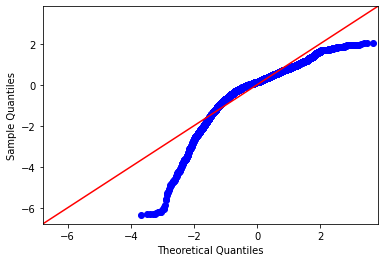

In [16]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

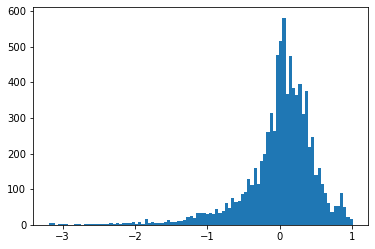

In [17]:
plt.hist(residuals, bins='auto');

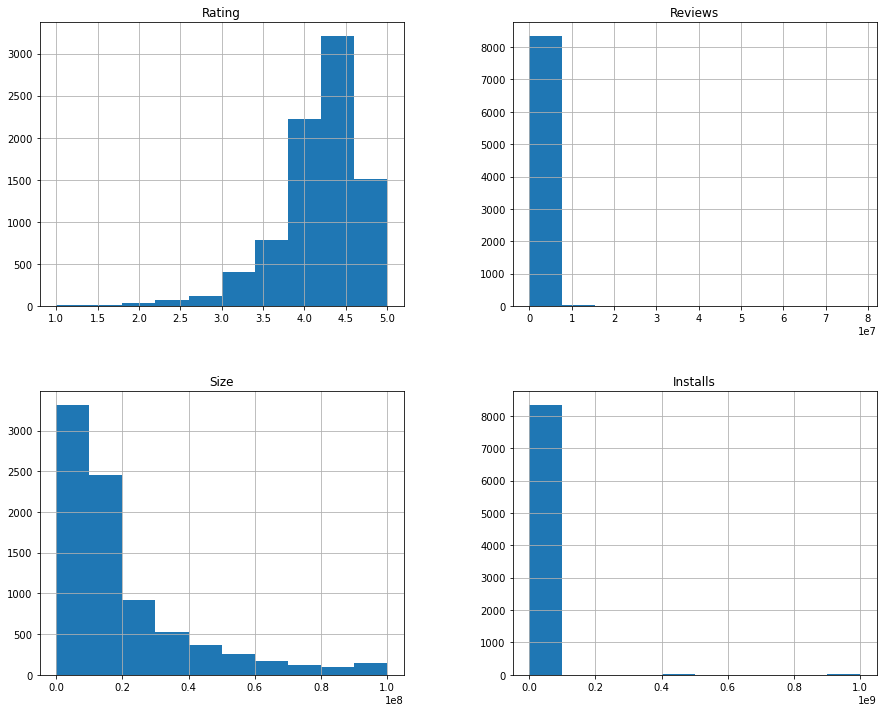

In [19]:
model_df[['Rating', 'Reviews', 'Size', 'Installs']].hist(figsize=(15,12));

All the continuous variable are very skewed. Major outliers with Reviews and Installs. 

# Linear Regression

# KNeighbors Regression

# Random Forest